## 7. Optimization and Refinement

### `07_optimization_integration.ipynb`

Error loading features: [Errno 2] No such file or directory: '../outputs/features\\video_features.csv'
Using synthetic data for demonstration

Using 6 features for model optimization

1. Evaluating Different Model Architectures

Evaluating Basic Neural Network...


C:\Users\naufa\anaconda3\envs\cv_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Accuracy: 0.4500
  ROC AUC: 0.4167
  Training time: 2.49 seconds

Evaluating Deeper Neural Network...
  Accuracy: 0.6500
  ROC AUC: 0.7083
  Training time: 2.86 seconds

Evaluating Random Forest...
  Accuracy: 0.6500
  ROC AUC: 0.6771
  Training time: 0.13 seconds

Evaluating Gradient Boosting...
  Accuracy: 0.6500
  ROC AUC: 0.6146
  Training time: 0.11 seconds

Evaluating SVM...
  Accuracy: 0.6500
  ROC AUC: 0.4167
  Training time: 0.00 seconds


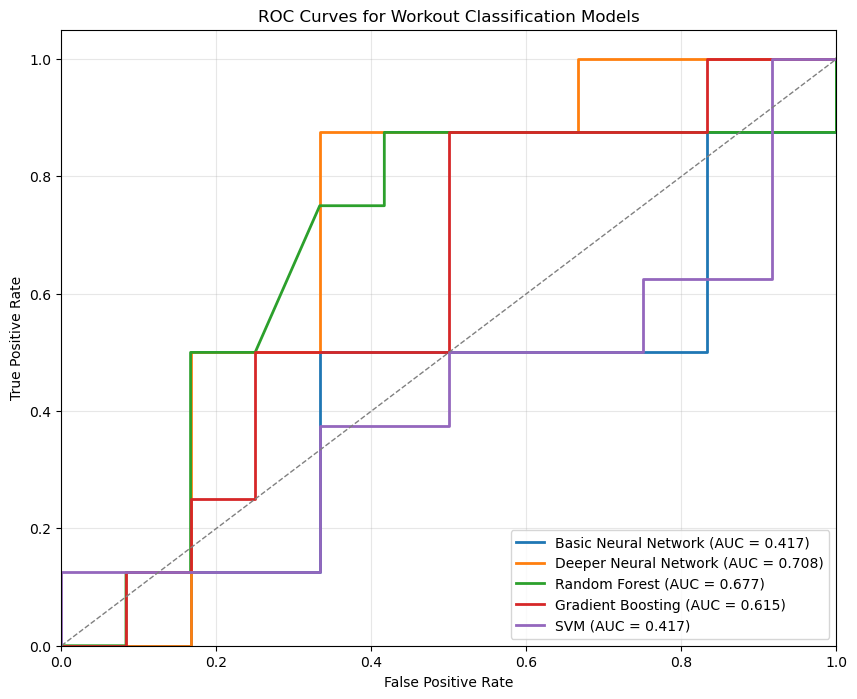


Model Comparison for Workout Classification:
                   Model  Accuracy  Precision  Recall  F1 Score   ROC AUC  \
1  Deeper Neural Network      0.65   0.555556   0.625  0.588235  0.708333   
2          Random Forest      0.65   0.571429   0.500  0.533333  0.677083   
3      Gradient Boosting      0.65   0.571429   0.500  0.533333  0.614583   
0   Basic Neural Network      0.45   0.200000   0.125  0.153846  0.416667   
4                    SVM      0.65   0.571429   0.500  0.533333  0.416667   

   Training Time (s)  
1           2.855561  
2           0.130847  
3           0.114651  
0           2.490646  
4           0.003579  


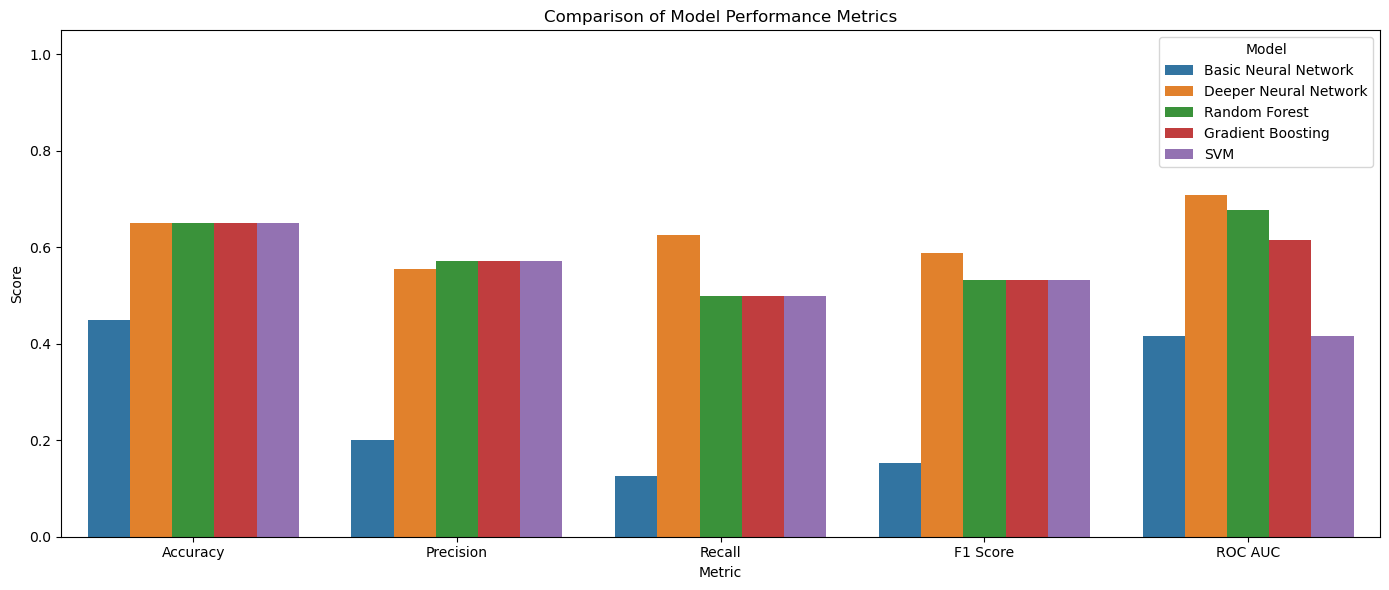


Selected Deeper Neural Network as the best model for workout classification

2. Optimizing Fall Detection Model

Evaluating Basic Neural Network...


C:\Users\naufa\anaconda3\envs\cv_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Accuracy: 0.5833
  ROC AUC: 0.5625
  Training time: 3.38 seconds

Evaluating Deeper Neural Network...
  Accuracy: 0.6667
  ROC AUC: 0.5625
  Training time: 4.16 seconds

Evaluating Random Forest...
  Accuracy: 0.5833
  ROC AUC: 0.5312
  Training time: 0.11 seconds

Evaluating Gradient Boosting...
  Accuracy: 0.5833
  ROC AUC: 0.6250
  Training time: 0.08 seconds

Evaluating SVM...
  Accuracy: 0.5833
  ROC AUC: 0.7812
  Training time: 0.00 seconds


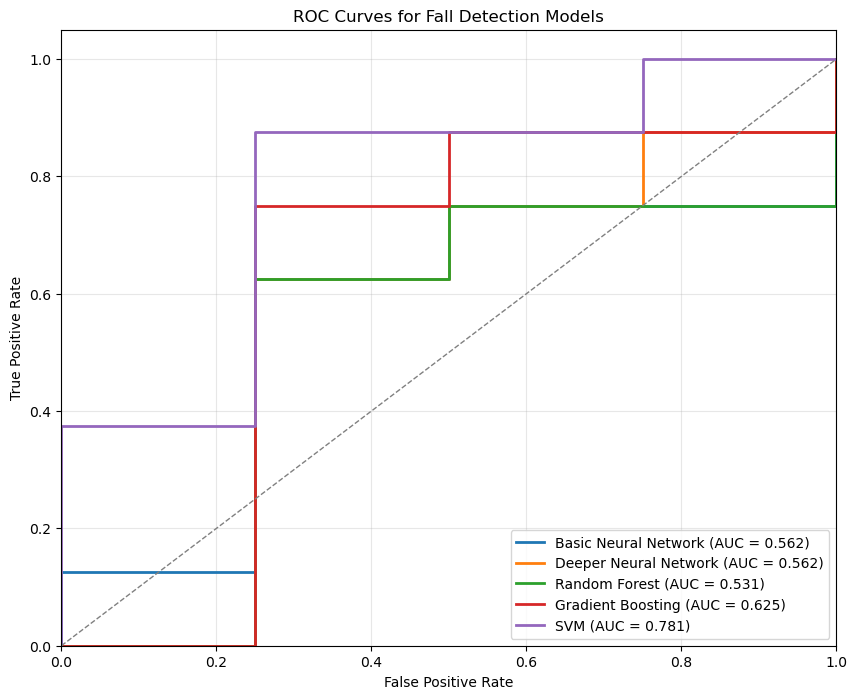


Model Comparison for Fall Detection:
                   Model  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
4                    SVM  0.583333   0.636364   0.875  0.736842  0.78125   
3      Gradient Boosting  0.583333   0.636364   0.875  0.736842  0.62500   
0   Basic Neural Network  0.583333   0.636364   0.875  0.736842  0.56250   
1  Deeper Neural Network  0.666667   0.700000   0.875  0.777778  0.56250   
2          Random Forest  0.583333   0.666667   0.750  0.705882  0.53125   

   Training Time (s)  
4           0.002301  
3           0.080746  
0           3.384661  
1           4.161089  
2           0.105999  

Selected SVM as the best model for fall detection

3. Hyperparameter Tuning
Using the best neural network model without explicit hyperparameter tuning.
Tuning hyperparameters for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Tuned model performance - Accuracy: 0.6667, ROC AUC: 0.53

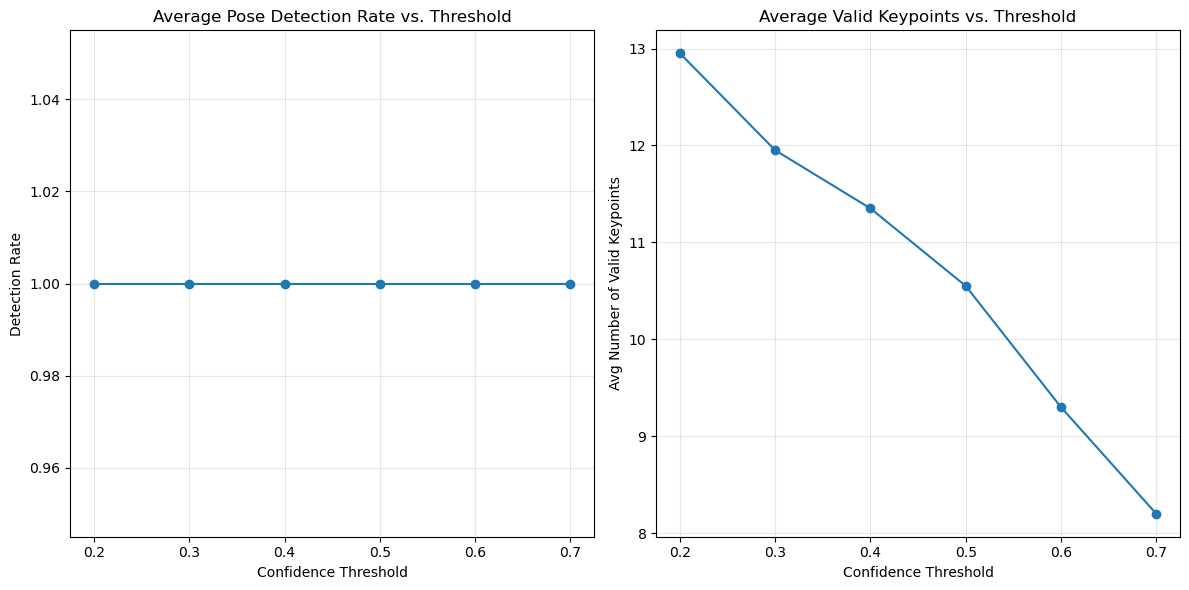


Optimal confidence threshold: 0.2

5. Creating Optimized Pipeline
Optimized detection system saved to ../outputs/optimized_models\optimized_detection_system.pkl

Testing optimized system on sample videos...

Processing fall_1.mp4...

0: 384x640 2 persons, 63.2ms
Speed: 2.8ms preprocess, 63.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 61.2ms
Speed: 5.8ms preprocess, 61.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 60.7ms
Speed: 2.6ms preprocess, 60.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 57.3ms
Speed: 3.9ms preprocess, 57.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 68.3ms
Speed: 4.0ms preprocess, 68.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 56.9ms
Speed: 3.5ms preprocess, 56.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 

In [27]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from ultralytics import YOLO
import joblib
import pickle
import time
%matplotlib inline

# Set paths
DATA_DIR = "../data"
MODELS_DIR = "../outputs/models"
FEATURES_DIR = "../outputs/features"
OUTPUT_DIR = "../outputs/optimized_models"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load the features data
try:
    features_file = os.path.join(FEATURES_DIR, 'video_features.csv')
    features_df = pd.read_csv(features_file)
    print(f"Loaded features with {len(features_df)} samples")
    
    # Display class distribution
    print("\nClass distribution:")
    print(features_df['label'].value_counts())
    
except Exception as e:
    print(f"Error loading features: {e}")
    print("Using synthetic data for demonstration")
    
    # Create synthetic data
    np.random.seed(42)
    n_samples = 100
    features_df = pd.DataFrame({
        'max_velocity': np.random.rand(n_samples),
        'mean_velocity': np.random.rand(n_samples),
        'max_height': np.random.rand(n_samples),
        'min_height': np.random.rand(n_samples),
        'height_range': np.random.rand(n_samples),
        'head_y_change': np.random.rand(n_samples),
        'label': np.random.choice(['fall', 'workout', 'adl'], n_samples, 
                                 p=[0.3, 0.4, 0.3])
    })

# Prepare data for binary classification (workout vs. non-workout)
features_df['is_workout'] = features_df['label'] == 'workout'
features_df['is_fall'] = features_df['label'] == 'fall'

# Select features (drop non-numeric and target columns)
feature_cols = features_df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in feature_cols 
               if col not in ['is_workout', 'is_fall', 'detection_rate']]

print(f"\nUsing {len(feature_cols)} features for model optimization")

# Handle missing values
features_df[feature_cols] = features_df[feature_cols].fillna(0)

# ================================================
# 1. Evaluating Different Model Architectures
# ================================================
print("\n1. Evaluating Different Model Architectures")
print("===========================================")

def evaluate_model_architectures(X, y, feature_cols):
    """Evaluate different model architectures on the data"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to test
    models = {
        'Basic Neural Network': Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='sigmoid')
        ]),
        
        'Deeper Neural Network': Sequential([
            Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ]),
        
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        
        'SVM': SVC(kernel='rbf', probability=True, random_state=42)
    }
    
    # Train and evaluate each model
    results = {}
    
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Different handling for sklearn vs keras models
        if isinstance(model, tf.keras.Model):
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
            )
            
            # Train the model
            start_time = time.time()
            history = model.fit(
                X_train_scaled, y_train,
                validation_split=0.2,
                epochs=30,
                batch_size=16,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                verbose=0
            )
            training_time = time.time() - start_time
            
            # Evaluate
            y_pred_proba = model.predict(X_test_scaled, verbose=0)
            y_pred = (y_pred_proba > 0.5).astype(int).flatten()
            
        else:  # sklearn model
            # Train
            start_time = time.time()
            model.fit(X_train_scaled, y_train)
            training_time = time.time() - start_time
            
            # Evaluate
            y_pred = model.predict(X_test_scaled)
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                y_pred_proba = model.decision_function(X_test_scaled)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': report['1']['precision'] if '1' in report else report['True']['precision'],
            'recall': report['1']['recall'] if '1' in report else report['True']['recall'],
            'f1': report['1']['f1-score'] if '1' in report else report['True']['f1-score'],
            'roc_auc': roc_auc,
            'training_time': training_time,
            'fpr': fpr,
            'tpr': tpr,
            'y_pred': y_pred,
            'y_test': y_test,
            'model': model
        }
        
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}")
        print(f"  Training time: {training_time:.2f} seconds")
    
    return results, scaler

# Test model architectures on workout classification
X = features_df[feature_cols].values
y_workout = features_df['is_workout'].values

model_results, workout_scaler = evaluate_model_architectures(X, y_workout, feature_cols)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, results in model_results.items():
    plt.plot(results['fpr'], results['tpr'], lw=2, label=f"{name} (AUC = {results['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Workout Classification Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Compare model performance
model_comparison = pd.DataFrame({
    'Model': [name for name in model_results.keys()],
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'Precision': [results['precision'] for results in model_results.values()],
    'Recall': [results['recall'] for results in model_results.values()],
    'F1 Score': [results['f1'] for results in model_results.values()],
    'ROC AUC': [results['roc_auc'] for results in model_results.values()],
    'Training Time (s)': [results['training_time'] for results in model_results.values()]
})

print("\nModel Comparison for Workout Classification:")
print(model_comparison.sort_values('ROC AUC', ascending=False))

# Visualize model comparison
plt.figure(figsize=(14, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
model_comparison_melted = pd.melt(model_comparison, 
                                id_vars=['Model'], 
                                value_vars=metrics,
                                var_name='Metric', value_name='Score')

sns.barplot(data=model_comparison_melted, x='Metric', y='Score', hue='Model')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Select the best model based on ROC AUC
best_model_name = model_comparison.loc[model_comparison['ROC AUC'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']
print(f"\nSelected {best_model_name} as the best model for workout classification")

# Save the best model for workout detection
if isinstance(best_model, tf.keras.Model):
    best_model.save(os.path.join(OUTPUT_DIR, 'optimized_workout_model.h5'))
else:
    joblib.dump(best_model, os.path.join(OUTPUT_DIR, 'optimized_workout_model.pkl'))

joblib.dump(workout_scaler, os.path.join(OUTPUT_DIR, 'optimized_workout_scaler.pkl'))
pd.Series(feature_cols).to_csv(os.path.join(OUTPUT_DIR, 'optimized_feature_columns.txt'), index=False)

# ================================================
# 2. Optimizing Fall Detection Model
# ================================================
print("\n2. Optimizing Fall Detection Model")
print("=================================")

# Filter only non-workout samples for fall detection
non_workout_df = features_df[~features_df['is_workout']]
X_fall = non_workout_df[feature_cols].values
y_fall = non_workout_df['is_fall'].values

if len(np.unique(y_fall)) > 1:  # Ensure we have both fall and non-fall examples
    fall_model_results, fall_scaler = evaluate_model_architectures(X_fall, y_fall, feature_cols)
    
    # Plot ROC curves for fall models
    plt.figure(figsize=(10, 8))
    for name, results in fall_model_results.items():
        plt.plot(results['fpr'], results['tpr'], lw=2, label=f"{name} (AUC = {results['roc_auc']:.3f})")

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Fall Detection Models')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Compare fall model performance
    fall_model_comparison = pd.DataFrame({
        'Model': [name for name in fall_model_results.keys()],
        'Accuracy': [results['accuracy'] for results in fall_model_results.values()],
        'Precision': [results['precision'] for results in fall_model_results.values()],
        'Recall': [results['recall'] for results in fall_model_results.values()],
        'F1 Score': [results['f1'] for results in fall_model_results.values()],
        'ROC AUC': [results['roc_auc'] for results in fall_model_results.values()],
        'Training Time (s)': [results['training_time'] for results in fall_model_results.values()]
    })
    
    print("\nModel Comparison for Fall Detection:")
    print(fall_model_comparison.sort_values('ROC AUC', ascending=False))
    
    # Select the best fall model
    best_fall_model_name = fall_model_comparison.loc[fall_model_comparison['ROC AUC'].idxmax(), 'Model']
    best_fall_model = fall_model_results[best_fall_model_name]['model']
    print(f"\nSelected {best_fall_model_name} as the best model for fall detection")
    
    # Save the best fall model
    if isinstance(best_fall_model, tf.keras.Model):
        best_fall_model.save(os.path.join(OUTPUT_DIR, 'optimized_fall_model.h5'))
    else:
        joblib.dump(best_fall_model, os.path.join(OUTPUT_DIR, 'optimized_fall_model.pkl'))
        
    joblib.dump(fall_scaler, os.path.join(OUTPUT_DIR, 'optimized_fall_scaler.pkl'))
else:
    print("Not enough data to train fall detection model (need both fall and non-fall examples)")

# ================================================
# 3. Hyperparameter Tuning
# ================================================
print("\n3. Hyperparameter Tuning")
print("=======================")

from sklearn.model_selection import GridSearchCV

# Function for hyperparameter tuning
def tune_hyperparameters(X, y, best_model_name):
    """Tune hyperparameters for the best model type"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define parameters to tune based on the best model type
    if best_model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        
    elif best_model_name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        
    elif best_model_name == 'SVM':
        model = SVC(probability=True, random_state=42)
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.1, 0.01],
            'kernel': ['rbf', 'linear', 'poly']
        }
        
    else:  # Neural Network models are tuned differently
        print(f"Hyperparameter tuning for {best_model_name} will be handled separately.")
        return None, scaler
    
    # Set up grid search with cross-validation
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    
    # Fit grid search
    print(f"Tuning hyperparameters for {best_model_name}...")
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best parameters and model
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if hasattr(best_model, 'predict_proba'):
        y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = best_model.decision_function(X_test_scaled)
        
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    print(f"Tuned model performance - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
    
    return best_model, scaler

# Tune the best workout detection model if it's a traditional ML model
if best_model_name in ['Random Forest', 'Gradient Boosting', 'SVM']:
    tuned_workout_model, tuned_workout_scaler = tune_hyperparameters(X, y_workout, best_model_name)
    
    if tuned_workout_model is not None:
        # Save the tuned model
        joblib.dump(tuned_workout_model, os.path.join(OUTPUT_DIR, 'tuned_workout_model.pkl'))
        joblib.dump(tuned_workout_scaler, os.path.join(OUTPUT_DIR, 'tuned_workout_scaler.pkl'))
        best_workout_model = tuned_workout_model
    else:
        best_workout_model = best_model
else:
    best_workout_model = best_model
    print(f"Using the best neural network model without explicit hyperparameter tuning.")

# Similarly tune the fall detection model if applicable
if 'best_fall_model_name' in locals() and best_fall_model_name in ['Random Forest', 'Gradient Boosting', 'SVM']:
    if len(np.unique(y_fall)) > 1:
        tuned_fall_model, tuned_fall_scaler = tune_hyperparameters(X_fall, y_fall, best_fall_model_name)
        
        if tuned_fall_model is not None:
            # Save the tuned model
            joblib.dump(tuned_fall_model, os.path.join(OUTPUT_DIR, 'tuned_fall_model.pkl'))
            joblib.dump(tuned_fall_scaler, os.path.join(OUTPUT_DIR, 'tuned_fall_scaler.pkl'))
            best_fall_model = tuned_fall_model
    else:
        print("Not enough fall data for hyperparameter tuning")

# ================================================
# 4. YOLOv8-Pose Threshold Optimization
# ================================================
print("\n4. YOLOv8-Pose Threshold Optimization")
print("===================================")

# Function to test different confidence thresholds for pose detection
def optimize_yolo_pose_thresholds(test_videos, num_videos=3):
    """Test different confidence thresholds for YOLOv8-pose"""
    if not test_videos:
        print("No test videos available")
        return
    
    # Initialize YOLOv8-pose model
    pose_model = YOLO('yolov8n-pose.pt')
    
    # Sample a few videos
    videos_to_test = test_videos[:num_videos]
    
    # Confidence thresholds to test
    thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    
    # Results dictionary
    results = {threshold: {'detection_rate': [], 'keypoint_count': []} for threshold in thresholds}
    
    for video_path in videos_to_test:
        print(f"\nTesting thresholds on {os.path.basename(video_path)}...")
        
        # Load the video
        cap = cv2.VideoCapture(str(video_path))
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        # Sample 10 frames
        indices = np.linspace(0, frame_count-1, 10, dtype=int)
        frames = []
        
        for idx in indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
            ret, frame = cap.read()
            if ret:
                frames.append(frame)
        
        cap.release()
        
        # Process frames with different thresholds
        for threshold in thresholds:
            detected_frames = 0
            total_keypoints = 0
            
            for frame in frames:
                # Run pose detection with current threshold
                results_at_threshold = pose_model(frame, conf=threshold)
                
                # Check if any pose was detected
                if len(results_at_threshold[0].keypoints.data) > 0:
                    detected_frames += 1
                    # Count keypoints with confidence above threshold
                    keypoints = results_at_threshold[0].keypoints.data[0]  # First person
                    valid_keypoints = (keypoints[:, 2] > threshold).sum().item()
                    total_keypoints += valid_keypoints
            
            # Calculate detection rate
            detection_rate = detected_frames / len(frames) if frames else 0
            avg_keypoints = total_keypoints / detected_frames if detected_frames > 0 else 0
            
            # Store results
            results[threshold]['detection_rate'].append(detection_rate)
            results[threshold]['keypoint_count'].append(avg_keypoints)
            
            print(f"Threshold {threshold:.1f}: Detection rate: {detection_rate:.2f}, "
                 f"Avg valid keypoints: {avg_keypoints:.1f}")
    
    # Calculate averages across all videos
    avg_results = {}
    for threshold in thresholds:
        avg_detection_rate = np.mean(results[threshold]['detection_rate'])
        avg_keypoint_count = np.mean(results[threshold]['keypoint_count'])
        avg_results[threshold] = {
            'avg_detection_rate': avg_detection_rate,
            'avg_keypoint_count': avg_keypoint_count
        }
    
    # Plot results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(thresholds, [avg_results[t]['avg_detection_rate'] for t in thresholds], 'o-')
    plt.title('Average Pose Detection Rate vs. Threshold')
    plt.xlabel('Confidence Threshold')
    plt.ylabel('Detection Rate')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(thresholds, [avg_results[t]['avg_keypoint_count'] for t in thresholds], 'o-')
    plt.title('Average Valid Keypoints vs. Threshold')
    plt.xlabel('Confidence Threshold')
    plt.ylabel('Avg Number of Valid Keypoints')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal threshold (balancing detection rate and keypoint count)
    optimal_threshold = max(thresholds, key=lambda t: avg_results[t]['avg_detection_rate'] * 
                                                     (avg_results[t]['avg_keypoint_count'] / 17))
    
    print(f"\nOptimal confidence threshold: {optimal_threshold}")
    return optimal_threshold

# Get test videos from each category
print("Collecting test videos...")
fall_videos = list(Path(DATA_DIR).rglob("*fall*.avi"))
adl_videos = list(Path(DATA_DIR).rglob("*adl*.avi"))
workout_videos = list(Path(DATA_DIR).rglob("*.mp4"))

test_videos = []
if fall_videos:
    test_videos.extend(fall_videos[:2])
if adl_videos:
    test_videos.extend(adl_videos[:2])
if workout_videos:
    test_videos.extend(workout_videos[:2])

# Optimize YOLOv8-pose thresholds
if test_videos:
    optimal_pose_threshold = optimize_yolo_pose_thresholds(test_videos)
else:
    optimal_pose_threshold = 0.5
    print("No test videos found, using default threshold of 0.5")

# ================================================
# 5. Create Optimized Pipeline
# ================================================
print("\n5. Creating Optimized Pipeline")
print("============================")

class OptimizedFallWorkoutDetectionSystem:
    def __init__(self, workout_model, fall_model, workout_scaler, fall_scaler, 
                feature_cols, pose_threshold=0.5):
        self.workout_model = workout_model
        self.fall_model = fall_model
        self.workout_scaler = workout_scaler
        self.fall_scaler = fall_scaler
        self.feature_cols = feature_cols
        self.pose_threshold = pose_threshold
        
        # Initialize YOLO models
        self.person_model = YOLO('yolov8n.pt')
        self.pose_model = YOLO('yolov8n-pose.pt')
    
    def process_video(self, video_path, output_visualization=False):
        """Process a video through the optimized two-stage detection system"""
        # Extract features using YOLOv8-pose
        keypoints, features = self.extract_features_with_yolo(video_path)
        
        if features is None:
            return {
                'result': 'no_features_extracted',
                'confidence': 0.0,
                'video_path': video_path
            }
        
        # Prepare features for model input
        X = np.array([[features.get(col, 0) for col in self.feature_cols]])
        
        # Stage 1: Check if it's a workout
        X_workout_scaled = self.workout_scaler.transform(X)
        
        if isinstance(self.workout_model, tf.keras.Model):
            workout_pred = self.workout_model.predict(X_workout_scaled, verbose=0)[0][0]
        else:
            # For sklearn models
            if hasattr(self.workout_model, 'predict_proba'):
                workout_pred = self.workout_model.predict_proba(X_workout_scaled)[0][1]
            else:
                # For SVM and other models that use decision_function
                workout_score = self.workout_model.decision_function(X_workout_scaled)[0]
                workout_pred = 1 / (1 + np.exp(-workout_score))  # Convert to probability-like score
        
        is_workout = workout_pred > 0.5
        
        if is_workout:
            result = {
                'result': 'workout',
                'confidence': float(workout_pred),
                'video_path': video_path,
                'features': features
            }
        else:
            # Stage 2: If not workout, check for fall
            X_fall_scaled = self.fall_scaler.transform(X)
            
            if isinstance(self.fall_model, tf.keras.Model):
                fall_pred = self.fall_model.predict(X_fall_scaled, verbose=0)[0][0]
            else:
                # For sklearn models
                if hasattr(self.fall_model, 'predict_proba'):
                    fall_pred = self.fall_model.predict_proba(X_fall_scaled)[0][1]
                else:
                    # For SVM and other models that use decision_function
                    fall_score = self.fall_model.decision_function(X_fall_scaled)[0]
                    fall_pred = 1 / (1 + np.exp(-fall_score))  # Convert to probability-like score
            
            is_fall = fall_pred > 0.5
            
            if is_fall:
                result = {
                    'result': 'fall',
                    'confidence': float(fall_pred),
                    'video_path': video_path,
                    'features': features
                }
            else:
                result = {
                    'result': 'other_activity',
                    'confidence': float(1.0 - fall_pred),
                    'video_path': video_path,
                    'features': features
                }
        
        # Create visualization if requested
        if output_visualization:
            self.create_visualization(video_path, result)
        
        return result
    
    def extract_features_with_yolo(self, video_path, num_frames=16):
        """Extract pose and motion features using YOLOv8-pose"""
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        
        # Calculate frame indices to sample
        indices = np.linspace(0, frame_count-1, num_frames, dtype=int)
        
        # Store keypoint sequences
        keypoint_sequence = []
        is_pose_detected = []
        
        for idx in indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
            ret, frame = cap.read()
            
            if not ret:
                keypoint_sequence.append(None)
                is_pose_detected.append(False)
                continue
            
            # Run YOLOv8-pose detection
            pose_results = self.pose_model(frame, conf=self.pose_threshold)
            
            if len(pose_results[0].keypoints.data) > 0:
                is_pose_detected.append(True)
                
                # Get the pose with highest confidence (usually the largest one)
                best_pose_idx = 0
                if len(pose_results[0].boxes) > 1:
                    # If multiple poses, get the one with highest confidence
                    confidences = [box.conf.item() for box in pose_results[0].boxes]
                    best_pose_idx = np.argmax(confidences)
                
                # Extract keypoints for the best pose
                pose_keypoints = pose_results[0].keypoints.data[best_pose_idx]
                
                # Convert to a flat list format
                frame_keypoints = []
                for kp_idx in range(pose_keypoints.shape[0]):
                    x, y, conf = pose_keypoints[kp_idx].tolist()
                    # Normalize coordinates
                    frame_keypoints.extend([
                        float(x) / frame_width,
                        float(y) / frame_height,
                        0.0,  # YOLOv8 doesn't provide z-coordinate
                        float(conf)
                    ])
                
                keypoint_sequence.append(frame_keypoints)
            else:
                is_pose_detected.append(False)
                keypoint_sequence.append(None)
        
        cap.release()
        
        # If no poses detected, return None
        if not any(is_pose_detected):
            return None, None
        
        # Calculate pose-based features
        valid_keypoints = [kp for kp in keypoint_sequence if kp is not None]
        
        if not valid_keypoints:
            return None, None
        
        # Create features
        features = {}
        
        # 1. Keypoint velocities
        if len(valid_keypoints) >= 2:
            velocities = []
            for i in range(1, len(valid_keypoints)):
                frame_velocities = []
                for j in range(0, len(valid_keypoints[i]), 4):  # Each keypoint has 4 values (x,y,z,v)
                    if j+3 < len(valid_keypoints[i]) and j+3 < len(valid_keypoints[i-1]):
                        # Calculate Euclidean distance between consecutive frames
                        dx = valid_keypoints[i][j] - valid_keypoints[i-1][j]
                        dy = valid_keypoints[i][j+1] - valid_keypoints[i-1][j+1]
                        # Note: YOLOv8 doesn't have z-coordinate, so we use 0
                        velocity = np.sqrt(dx**2 + dy**2)
                        frame_velocities.append(velocity)
                
                if frame_velocities:
                    velocities.append(frame_velocities)
            
            if velocities:
                features['max_velocity'] = np.max([np.max(v) if v else 0 for v in velocities])
                features['mean_velocity'] = np.mean([np.mean(v) if v else 0 for v in velocities])
                features['std_velocity'] = np.std([np.std(v) if v else 0 for v in velocities])
        
        # 2. Pose height variation
        heights = []
        for kp in valid_keypoints:
            y_values = [kp[i+1] for i in range(0, len(kp), 4)]
            if y_values:
                height = max(y_values) - min(y_values)
                heights.append(height)
        
        if heights:
            features['max_height'] = np.max(heights)
            features['min_height'] = np.min(heights)
            features['height_range'] = np.max(heights) - np.min(heights)
        
        # 3. Pose width variation
        widths = []
        for kp in valid_keypoints:
            x_values = [kp[i] for i in range(0, len(kp), 4)]
            if x_values:
                width = max(x_values) - min(x_values)
                widths.append(width)
        
        if widths:
            features['max_width'] = np.max(widths)
            features['min_width'] = np.min(widths)
            features['width_range'] = np.max(widths) - np.min(widths)
        
        # 4. Vertical position change (for falls)
        # Note: In YOLOv8 pose, nose is keypoint index 0
        nose_positions = []
        for kp in valid_keypoints:
            if len(kp) >= 4:  # Nose is first landmark in YOLOv8-pose
                nose_positions.append(kp[1])  # y-coordinate of nose
        
        if nose_positions and len(nose_positions) >= 2:
            features['head_y_change'] = nose_positions[-1] - nose_positions[0]
            features['max_head_y_change'] = np.max(nose_positions) - np.min(nose_positions)
        
        # Return both raw keypoints and extracted features
        return valid_keypoints, features
    
    def create_visualization(self, video_path, result):
        """Create a visualization of the detection results with YOLOv8-pose"""
        # Output path for the visualization
        output_path = os.path.join(OUTPUT_DIR, 
                                  f"{os.path.basename(video_path).split('.')[0]}_detection.mp4")
        
        # Read the video
        cap = cv2.VideoCapture(video_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        
        # Create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
        
        # Set up video processing
        frame_count = 0
        result_text = f"Result: {result['result'].upper()}"
        confidence_text = f"Confidence: {result['confidence']:.2f}"
        
        # Set text color based on result
        if result['result'] == 'workout':
            color = (0, 255, 0)  # Green for workout
        elif result['result'] == 'fall':
            color = (0, 0, 255)  # Red for fall
        else:
            color = (255, 0, 0)  # Blue for other
            
        while True:
            ret, frame = cap.read()
            
            if not ret:
                break
                
            frame_count += 1
            
            # Process pose detection every 5 frames (to speed up processing)
            if frame_count % 5 == 0:
                # Run YOLOv8-pose detection
                pose_results = self.pose_model(frame, conf=self.pose_threshold)
                # Get annotated frame with keypoints
                annotated_frame = pose_results[0].plot()
            else:
                # Just use person detection for other frames
                person_results = self.person_model(frame, classes=[0])
                annotated_frame = person_results[0].plot()
            
            # Add text with detection result
            cv2.putText(annotated_frame, result_text, (10, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.putText(annotated_frame, confidence_text, (10, 70), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            
            # Write the frame
            out.write(annotated_frame)
            
        cap.release()
        out.release()
        
        print(f"Visualization saved to {output_path}")
        return output_path

# Initialize optimized detection system
optimized_system = OptimizedFallWorkoutDetectionSystem(
    workout_model=best_workout_model,
    fall_model=best_fall_model if 'best_fall_model' in locals() else None,
    workout_scaler=workout_scaler,
    fall_scaler=fall_scaler if 'fall_scaler' in locals() else None,
    feature_cols=feature_cols,
    pose_threshold=optimal_pose_threshold if 'optimal_pose_threshold' in locals() else 0.5
)

# Save the optimized system
optimized_system_dict = {
    'workout_model': best_workout_model,
    'fall_model': best_fall_model if 'best_fall_model' in locals() else None,
    'workout_scaler': workout_scaler,
    'fall_scaler': fall_scaler if 'fall_scaler' in locals() else None,
    'feature_cols': feature_cols,
    'pose_threshold': optimal_pose_threshold if 'optimal_pose_threshold' in locals() else 0.5
}

with open(os.path.join(OUTPUT_DIR, 'optimized_detection_system.pkl'), 'wb') as f:
    pickle.dump(optimized_system_dict, f)

print(f"Optimized detection system saved to {os.path.join(OUTPUT_DIR, 'optimized_detection_system.pkl')}")

# Test the optimized system on a few videos
if test_videos:
    print("\nTesting optimized system on sample videos...")
    test_results = []
    
    for video_path in test_videos[:3]:  # Test on first 3 videos
        print(f"\nProcessing {os.path.basename(video_path)}...")
        result = optimized_system.process_video(str(video_path), output_visualization=True)
        test_results.append(result)
        print(f"Result: {result['result']}, Confidence: {result['confidence']:.2f}")
    
    # Display a summary of results
    print("\nOptimized System Test Results:")
    for result in test_results:
        video_name = os.path.basename(result['video_path'])
        print(f"{video_name}: {result['result']} (confidence: {result['confidence']:.2f})")